# Distribution

There are kinds of statistical distributions hard to remember all of them, but implementing in hand would be very helpful to bring them to mind.

## Normal Distribution

The normal distribution is a classic distribution with a bell shape, also called 'Gaussian distribution'

<Axes: ylabel='Count'>

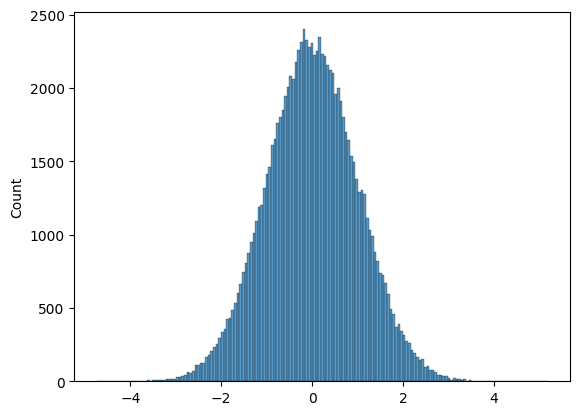

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# mean = 0
x = np.random.normal(0, size=100000)

sns.histplot(x)

## Binomial Distribution

It is a success (probability=`p`) count distribution of `N` times independent Bernoulli trial.

<Axes: ylabel='Count'>

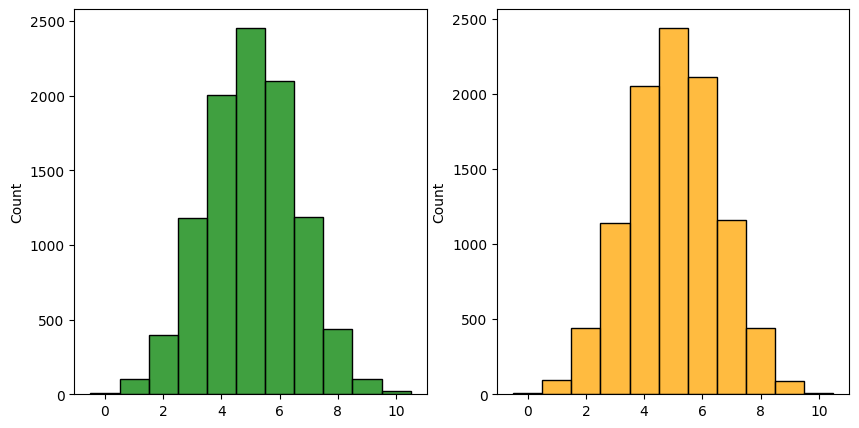

In [2]:
# N = 10, p = 0.5
x = np.random.binomial(10, 0.5, size=10000)

x2 = [sum(np.random.choice([0, 1], size=10, p= [0.5, 0.5])) for _ in range(10000)]

fig, axes = plt.subplots(1, 2, figsize = (10, 5))
sns.histplot(x, ax=axes[0], color='green', discrete=True)
sns.histplot(x2, ax=axes[1], color='orange', discrete=True)

## Geometric Distribution

Imagine you flip a coin, how many times (`N`) till a head appears.  
Tails: `N - 1`  
Head: `1`

<Axes: ylabel='Count'>

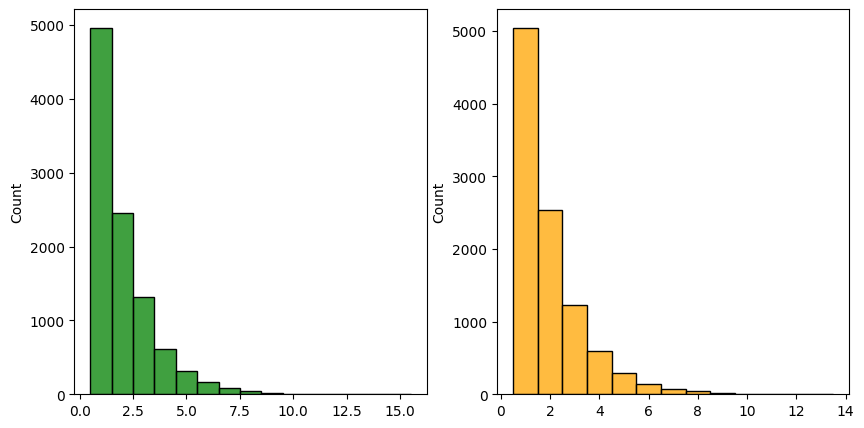

In [3]:
# p = 0.5
x = np.random.geometric(0.5, size= 10000)

def get_first_one():
    if np.random.choice([0, 1]) == 1:
        return 1 
    return get_first_one() + 1

x2 = [get_first_one() for _ in range(10000)]

fig, axes = plt.subplots(1, 2, figsize = (10, 5))
sns.histplot(x, ax=axes[0], color='green', discrete=True)
sns.histplot(x2, ax=axes[1], color='orange', discrete=True)

## Negative Bionmial Distribution

Given a number `r`, do Bernoulli trial `X` times, till getting `r` success (probability = `p`).

<Axes: ylabel='Count'>

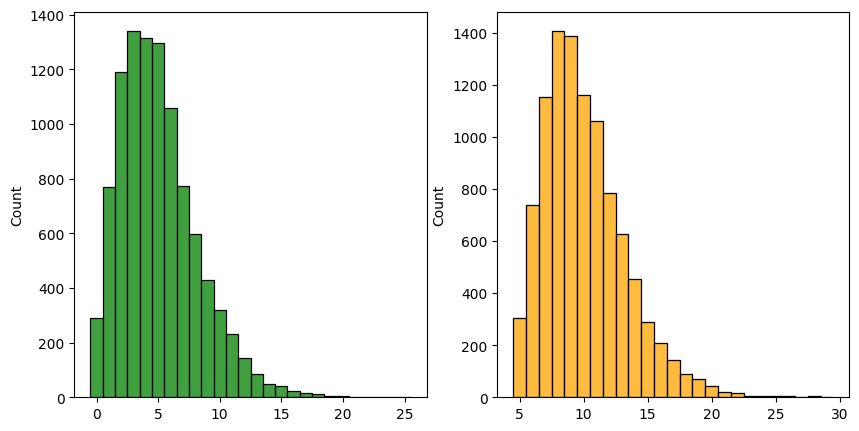

In [4]:
# r = 5, p = 0.5
x = np.random.negative_binomial(5, p=0.5, size=10000)

def at_least(n):
    ct = 0
    tmp_n = 0
    while tmp_n != n:
        if np.random.choice([0, 1]) == 1:
            tmp_n += 1
        ct += 1 
    return ct 

x2 = [at_least(5) for _ in range(0, 10000)]

fig, axes = plt.subplots(1, 2, figsize = (10, 5))
sns.histplot(x, ax=axes[0], color='green', discrete=True)
sns.histplot(x2, ax=axes[1], color='orange', discrete=True)

## Hypergeometric Distribution

The probability of the Bernoulli trial is different every time. It feels like you pick a ball from a bag without replacement.

<Axes: ylabel='Count'>

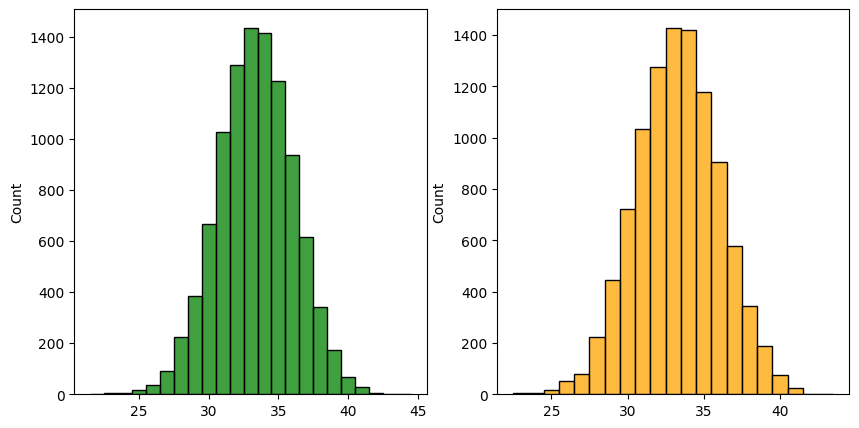

In [5]:

x = np.random.hypergeometric(100, 50, 50, size=10000)

x2 = [sum(np.random.choice([1] * 100 + [0] * 50, size=50, replace=False)) for _ in range(10000)]

fig, axes = plt.subplots(1, 2, figsize = (10, 5))
sns.histplot(x, ax=axes[0], color='green', discrete=True)
sns.histplot(x2, ax=axes[1], color='orange', discrete=True)

## Poisson Distribution

The distribution of which random events occur `N` times within a unit of time.

<Axes: ylabel='Density'>

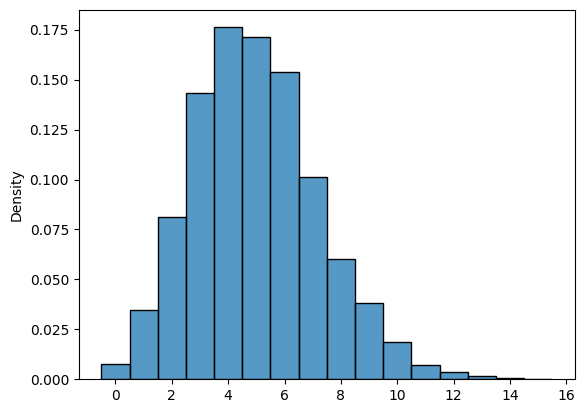

In [6]:
# N = 5
x = np.random.poisson(5, size=10000)

sns.histplot(x, discrete=True, stat='density')

## Uniform Distribution

Each event has the same probability.

<Axes: ylabel='Count'>

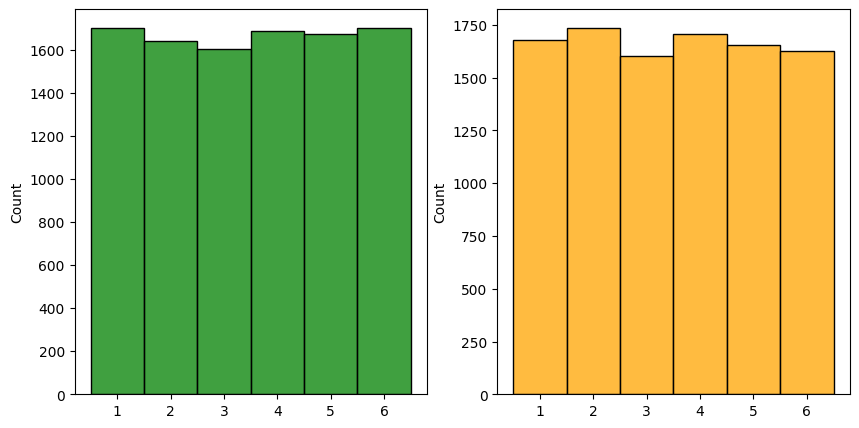

In [7]:
x= np.random.randint(1, 7, size=10000)

x2 = np.random.choice([1, 2, 3, 4, 5, 6], size=10000)

fig, axes = plt.subplots(1, 2, figsize = (10, 5))
sns.histplot(x, ax=axes[0], color='green', discrete=True)
sns.histplot(x2, ax=axes[1], color='orange', discrete=True)

## Gamma Distribution

Wait times for n events occur.  
With two parameters:  
1. shape distribution(α): the number of events  
2. scale parameter(β): the time interval between the events (average time)

<Axes: ylabel='Density'>

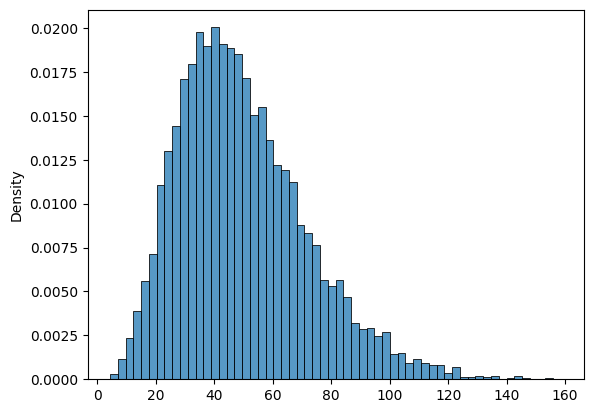

In [8]:
# The distribution of waiting time of 5 events occurs with 10 time unit interval
x = np.random.gamma(5, 10, size=10000)

sns.histplot(x, stat='density')

<Axes: ylabel='Density'>

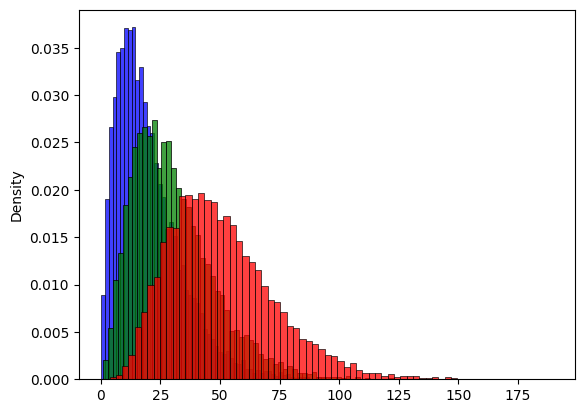

In [9]:
x = np.random.gamma(2, 10, size=10000)
x2 = np.random.gamma(3, 10, size=10000)
x3 = np.random.gamma(5, 10, size=10000)

sns.histplot(x, color='blue', stat='density')
sns.histplot(x2, color='green', stat='density')
sns.histplot(x3, color='red', stat='density')

<Axes: ylabel='Density'>

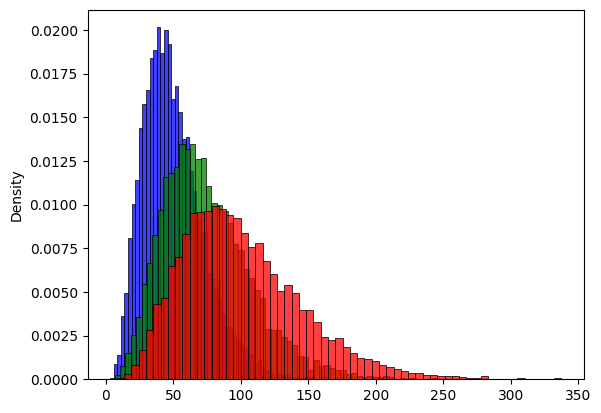

In [10]:
x = np.random.gamma(5, 10, size=10000)
x2 = np.random.gamma(5, 15, size=10000)
x3 = np.random.gamma(5, 20, size=10000)

sns.histplot(x, color='blue', stat='density')
sns.histplot(x2, color='green', stat='density')
sns.histplot(x3, color='red', stat='density')

<Axes: ylabel='Density'>

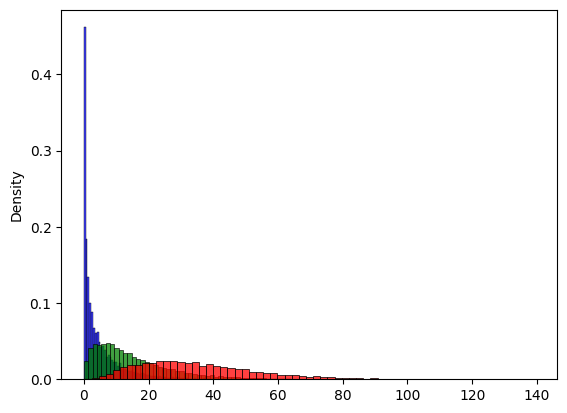

In [11]:
x = np.random.gamma(1/2, 10, size=10000)
x2 = np.random.gamma(3/2, 10, size=10000)
x3 = np.random.gamma(7/2, 10, size=10000)

sns.histplot(x, color='blue', stat='density')
sns.histplot(x2, color='green', stat='density')
sns.histplot(x3, color='red', stat='density')

## Chi-square Distribution

The main purpose of chi-square distributions is hypothesis testing, not describing real-world distributions.

<Axes: ylabel='Density'>

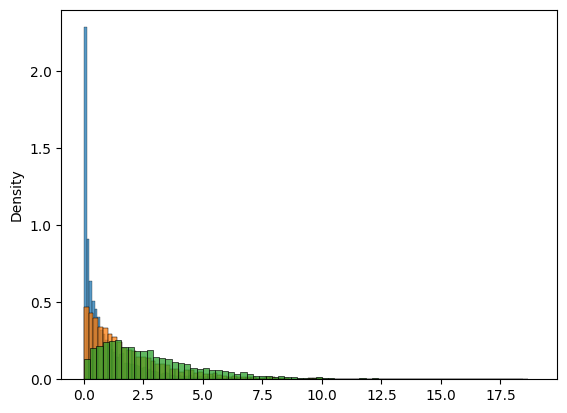

In [12]:
x = np.random.normal(size=10000)
y = np.random.normal(size=10000)
z = np.random.normal(size=10000)

sns.histplot(x*x, stat='density')
sns.histplot(x*x + y*y, stat='density')
sns.histplot(x*x + y*y + z*z, stat='density')

When a gamma distribution α = p / 2, and β = 2, it is a chi-square distribution.

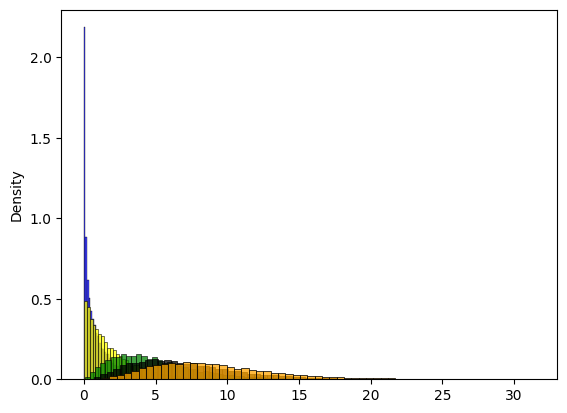

In [13]:
for i, j in zip([1, 2, 5, 7, 9], ['blue', 'yellow', 'green', 'black', 'orange']):
    sns.histplot(np.random.gamma(i / 2, 2, size=10000), stat='density', color=j)

## Exponential Distribution

Exponential distribution is often used to predict the waiting time until the next event occurs, such as a success, failure, or arrival.

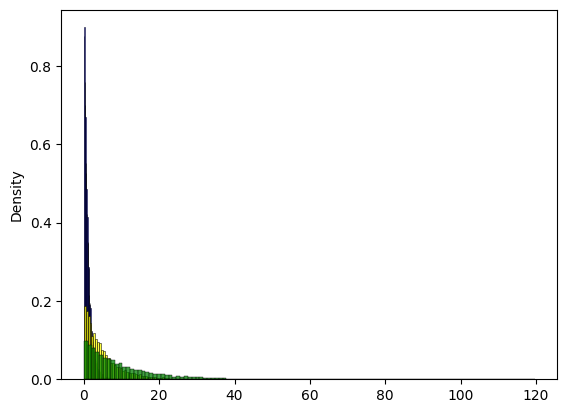

In [14]:
# i waiting time for one event occur
for i, j in zip([1, 5, 10], ['blue', 'yellow', 'green']):
    x = np.random.exponential(i, size=10000)
    sns.histplot(x, stat='density', color=j)

When a gamma distribution α = 1, it is a exponential distribution.

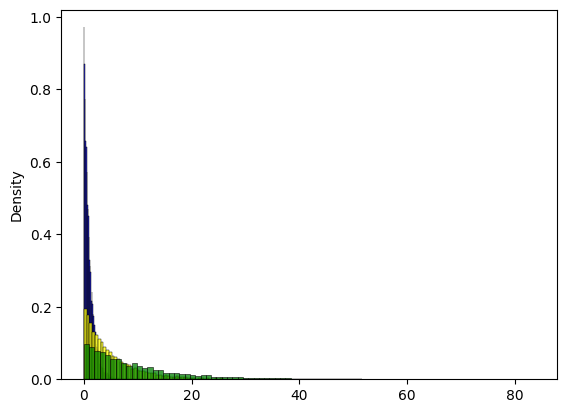

In [15]:
# i waiting time for one event occur
for i, j in zip([1, 5, 10], ['blue', 'yellow', 'green']):
    sns.histplot(np.random.gamma(1, i, size=10000), stat='density', color=j)

## Weibull Distribution

Commonly used to model the lifetime or failure times of a product.  
Probability that the time-to-failure.  
α : time to failure  
β : failure rate changes over time

(0.0, 10.0)

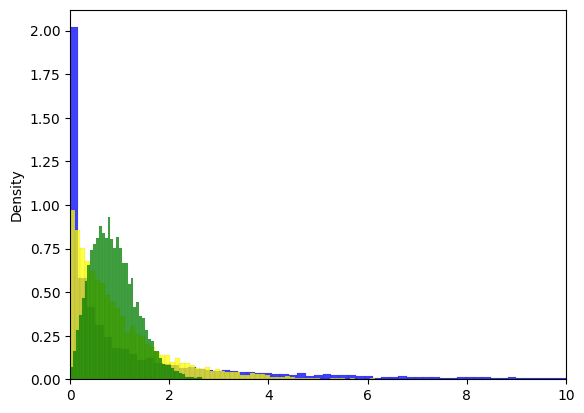

In [16]:
# i is time to failure, the x-axis is the failure counts
for i, j in zip([0.5, 1, 2], ['blue', 'yellow', 'green']):
    x = np.random.weibull(i, size=10000)
    sns.histplot(x, stat='density', color=j)
plt.xlim(0, 10)

C:\Users\ettep0985\AppData\Local\Temp\ipykernel_23132\2637284438.py:2: RuntimeWarning: divide by zero encountered in power
  return (b / a) * (x / a) ** (b - 1) * np.exp(-(x / a) ** b)


(0.0, 10.0)

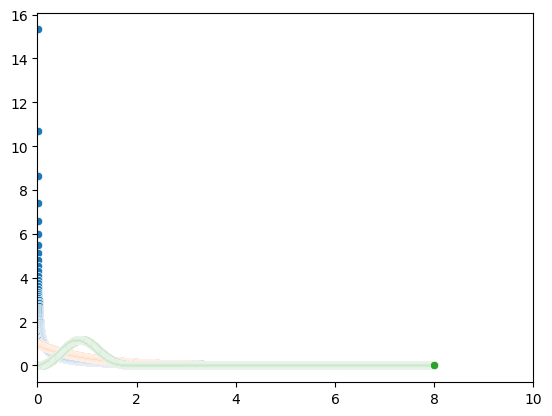

In [17]:
def weib(x, a, b):
    return (b / a) * (x / a) ** (b - 1) * np.exp(-(x / a) ** b)

for i, j in zip([0.5, 1, 3], ['blue', 'yellow', 'green']):
    x = weib(np.arange(0, 8, 0.001), 1, i)
    sns.scatterplot(x=np.arange(0, 8, 0.001), y=x)
plt.xlim(0, 10)

## Beta Distribution

It is best for representing a probabilistic distribution of probabilities: the case where we don't know what a probability is in advance, but we have some reasonable guesses.

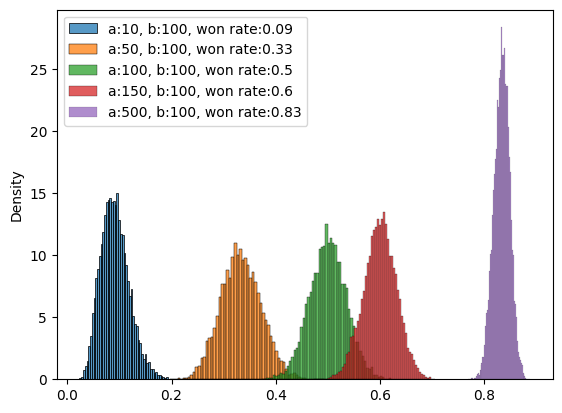

In [18]:
for i in [10, 50, 100, 150, 500]:
    won = i
    lose = 100
    won_rate = round(won / (won + lose), 2)
    x = np.random.beta(won, lose, size=10000)
    sns.histplot(x, stat='density', label = f"a:{won}, b:{lose}, won rate:{won_rate}")
plt.legend()

**There is no best distribution only fitter**